In our experiment, we used 2 sources of light. For each source, we measured direct light (5 trials) and light reflected of each of the 5 materials that we chose (5 trials for each material). Having obtained the data, we saved it as excel files - 1 file per 1 trial.

Next step was to determine the median data. This was done in excel, as it was the most convenient way. The median data were obtained for each measurement and saved as a .txt file - again, 1 file per 1 measurement. These files (6 per source of light, 12 in total) were then imported in this code for further analysis.

In [1]:
import numpy as np
from matplotlib.pyplot import figure, show, subplots

materials1 = ['aluminium1.txt','cardboard1.txt','nontransparentplastic1.txt','paper1.txt','transparentplastic1.txt']
materials2 = ['aluminium2.txt','cardboard2.txt','nontransparentplastic2.txt','paper2.txt','transparentplastic2.txt']

direct1 = open('direct1.txt')
direct1_wavelengths = []
direct1_intensities = []
text = direct1.readline()    
while text:
    try:
        nums = text.split()
        direct1_wavelengths.append(float(nums[0]))
        direct1_intensities.append(float(nums[1]))
    except:
        pass
    text = direct1.readline()
    
direct1_wavelengths = np.array(direct1_wavelengths)
direct1_intensities = np.array(direct1_intensities)
#print(direct1_wavelengths)
#print(direct1_intensities)
zero1_index = np.where(direct1_intensities == 0)
newdirect1_wavelengths = np.delete(direct1_wavelengths, zero1_index)
newdirect1_intensities = np.delete(direct1_intensities, zero1_index)
#print(newdirect1_wavelengths)
#print(newdirect1_intensities)

direct2 = open('direct2.txt')
direct2_wavelengths = []
direct2_intensities = []
text = direct2.readline()    
while text:
    try:
        nums = text.split()
        direct2_wavelengths.append(float(nums[0]))
        direct2_intensities.append(float(nums[1]))
    except:
        pass
    text = direct2.readline()

direct2_wavelengths = np.array(direct2_wavelengths)
direct2_intensities = np.array(direct2_intensities)   
#print(direct2_wavelengths)
#print(direct2_intensities)
zero2_index = np.where(direct2_intensities == 0)
newdirect2_wavelengths = np.delete(direct2_wavelengths, zero2_index)
newdirect2_intensities = np.delete(direct2_intensities, zero2_index)
#print(newdirect2_wavelengths)
#print(newdirect2_intensities)

reflectors = ['Al', 'cardboard', 'nontransapent plastic', 'paper', 'transparent_plastic']
reflectivity_1 = {}
reflectivity_2 = {}
i = 0
for file in materials1:
    openfile = open(file)
    wavelengths1 = []
    intensities1 = []
    text = openfile.readline()    
    while text:
        try:
            nums = text.split()
            wavelengths1.append(float(nums[0]))
            intensities1.append(float(nums[1]))
        except:
            pass
        text = openfile.readline()
    wavelengths1 = np.array(wavelengths1)
    intensities1 = np.array(intensities1)
    # print(wavelengths1)
    # print(intensities1)
    newwavelengths1 = np.delete(wavelengths1, zero1_index)
    newintensities1 = np.delete(intensities1, zero1_index)
    # print(newwavelengths1)
    # print(newintensities1)
    
    # reflectivity is given by the square of the ratio between the reflected radiation and the incident radiation, 
    # both at the same wavelength.
    reflectivity1 = ((newintensities1/newdirect1_intensities)/(61.5/24.5)**2)
    reflectivity_1[reflectors[i]] = [newwavelengths1, reflectivity1]
    i = i + 1

i = 0
for file in materials2:
    openfile = open(file)
    wavelengths2 = []
    intensities2 = []
    text = openfile.readline()    
    while text:
        try:
            nums = text.split()
            wavelengths2.append(float(nums[0]))
            intensities2.append(float(nums[1]))
        except:
            pass
        text = openfile.readline()
    wavelengths2 = np.array(wavelengths2)
    intensities2 = np.array(intensities2)
    # print(wavelengths2)
    # print(intensities2)
    newwavelengths2 = np.delete(wavelengths2, zero2_index)
    newintensities2 = np.delete(intensities2, zero2_index)
    
    # reflectivity is given by the square of the ratio between the reflected radiation and the incident radiation, 
    # both at the same wavelength.
    reflectivity2 = ((newintensities2/newdirect2_intensities)/(61.5/24.5)**2)
    reflectivity_2[reflectors[i]] = [newwavelengths2, reflectivity2]
    i = i + 1

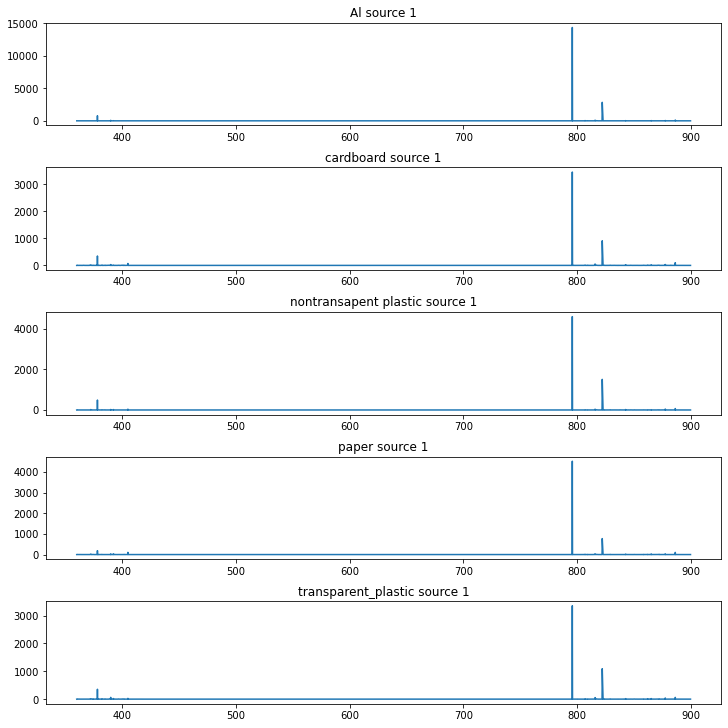

In [2]:
fig, frame = subplots(5,1, figsize=(10,10), constrained_layout=True)

for i in range(0,5):
    x = reflectivity_1[reflectors[i]][0]
    y = reflectivity_1[reflectors[i]][1]
    frame[i].plot(x, y)
    frame[i].set_title(str(reflectors[i]) + " source 1")

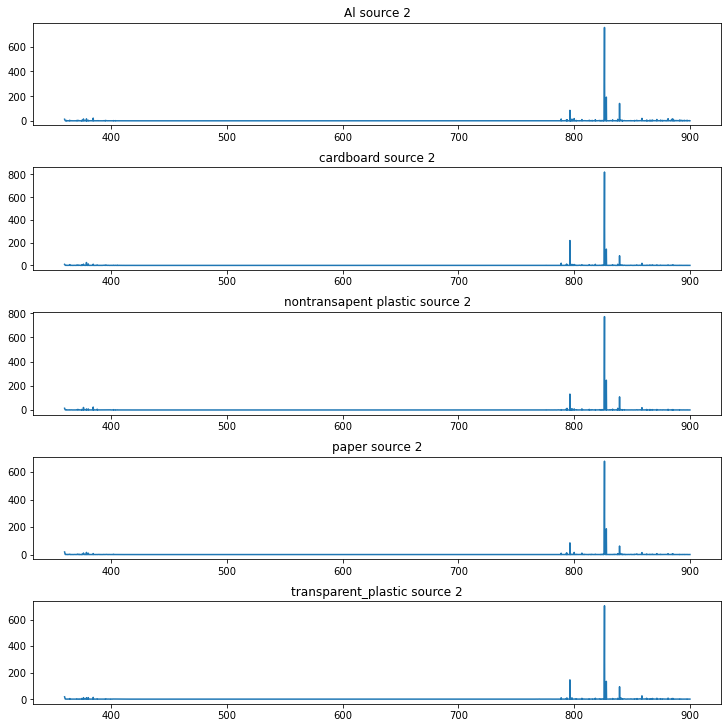

In [3]:
fig, frame = subplots(5,1, figsize=(10,10), constrained_layout=True)

for i in range(0,5):
    x = reflectivity_2[reflectors[i]][0]
    y = reflectivity_2[reflectors[i]][1]
    frame[i].plot(x, y)
    frame[i].set_title(str(reflectors[i]) + ' source 2')